In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras import models, layers, optimizers

Using TensorFlow backend.


In [3]:
# dataset - abalone
abalone_df = pd.read_csv('abalone_scikit_onehot_dataset.csv')
abalone_df.head(3)
len(abalone_df.columns)

,sex_1,sex_2,sex_3,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0


11

In [4]:
x_train = np.array(abalone_df.iloc[:3600, :-1])
x_test = np.array(abalone_df.iloc[3600:, :-1])
target = np.array(abalone_df.iloc[:, -1])

target_encoded = []
for data in target:
    target_encoded.append([0 if i!=data else 1 for i in range(29)])
oe_train = np.array(target_encoded[:3600])
oe_test = np.array(target_encoded[3600:])

y_train = np.array(abalone_df.iloc[:3600, -1])
y_test = np.array(abalone_df.iloc[3600:, -1])

In [6]:
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(10,)))
#model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3600 samples, validate on 577 samples
Epoch 1/500
3600/3600 [==============================] - 1s 190us/step - loss: 97.0544 - acc: 2.7778e-04 - val_loss: 83.1154 - val_acc: 0.0000e+00
Epoch 2/500
3600/3600 [==============================] - 0s 11us/step - loss: 94.0103 - acc: 2.7778e-04 - val_loss: 81.4751 - val_acc: 0.0000e+00
Epoch 3/500
3600/3600 [==============================] - 0s 15us/step - loss: 92.7905 - acc: 2.7778e-04 - val_loss: 80.7943 - val_acc: 0.0000e+00
Epoch 4/500
3600/3600 [==============================] - 0s 15us/step - loss: 92.2644 - acc: 2.7778e-04 - val_loss: 80.4951 - val_acc: 0.0000e+00
Epoch 5/500
3600/3600 [==============================] - 0s 15us/step - loss: 92.0240 - acc: 2.7778e-04 - val_loss: 80.3577 - val_acc: 0.0000e+00
Epoch 6/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.9094 - acc: 2.7778e-04 - val_loss: 80.2927 - val_acc: 0.0000e+00
Epoch 7/500
3600/3600 [=====

3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 55/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 56/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 57/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 58/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 59/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 60/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_

Epoch 110/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 111/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 112/500
3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 113/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 114/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 115/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 116/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_

3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 165/500
3600/3600 [==============================] - 0s 10us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 166/500
3600/3600 [==============================] - 0s 10us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 167/500
3600/3600 [==============================] - 0s 10us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 168/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 169/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 170/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 220/500
3600/3600 [==============================] - 0s 10us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 221/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 222/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 223/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 224/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 225/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 275/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 276/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 277/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 278/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 279/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 280/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 330/500
3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 331/500
3600/3600 [==============================] - 0s 14us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 332/500
3600/3600 [==============================] - 0s 15us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 333/500
3600/3600 [==============================] - 0s 14us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 334/500
3600/3600 [==============================] - 0s 14us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 335/500
3600/3600 [==============================] - 0s 15us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

3600/3600 [==============================] - 0s 15us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 385/500
3600/3600 [==============================] - 0s 14us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 386/500
3600/3600 [==============================] - 0s 16us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 387/500
3600/3600 [==============================] - 0s 16us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 388/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 389/500
3600/3600 [==============================] - 0s 14us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 390/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 440/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 441/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 442/500
3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 443/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 444/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 445/500
3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

3600/3600 [==============================] - 0s 11us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 495/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 496/500
3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 497/500
3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 498/500
3600/3600 [==============================] - 0s 13us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 499/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 - val_acc: 0.0000e+00
Epoch 500/500
3600/3600 [==============================] - 0s 12us/step - loss: 91.8014 - acc: 2.7778e-04 - val_loss: 80.2340 

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

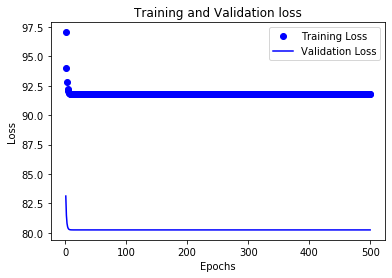

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

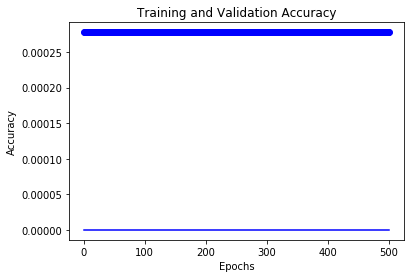

In [9]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [8]:
results = model.evaluate(x_test, y_test)
results

577/577 [==============================] - 0s 78us/step


[80.23396880415945, 0.0]